In [1]:
import json

from pathlib import Path

import pandas as pd
import numpy as np

import biopsykit as bp


from biopsykit.classification.model_selection import SklearnPipelinePermuter
import pepbench.plotting
from pepbench.io import load_best_performing_algos_b_point, load_preprocessed_training_data, compute_abs_error, get_best_pipeline_results, get_best_estimator, get_pipeline_steps

import pingouin as pg

import matplotlib.pyplot as plt

%matplotlib widget
%load_ext autoreload
%autoreload 2

In [10]:
model_path = Path("../../results/models/b-point")
data_path = Path("../../results/data")
result_path = Path("../../results")

In [3]:
input_data = pd.read_csv(data_path.joinpath("train_data_rr_interval_no_outlier_correction.csv"), index_col=[0,1,2,3,4])
input_data

rr_interval_ms_estimated  \
      participant phase         heartbeat_id_reference b_point_sample_reference                             
0     GDN0005     HoldingBreath 0                      388.0                                        850.0   
1     GDN0005     HoldingBreath 1                      404.0                                        778.0   
2     GDN0005     HoldingBreath 3                      376.0                                        746.0   
3     GDN0005     HoldingBreath 4                      390.0                                        766.0   
4     GDN0005     HoldingBreath 5                      386.0                                        790.0   
...                                                                                                   ...   
11606 VP_032      Talk          39                     310.0                                        619.0   
11607 VP_032      Talk          40                     322.0                                        680.0   
11608 VP_032      Talk          41                     340.0                                        719.0   
11609 VP_032      Talk          42                     311.0                                        698.0   
11610 VP_032      Talk          43                     307.0                                        689.0   

                                                                                 arbol2017-isoelectric-crossings  \
      participant phase         heartbeat_id_reference b_point_sample_reference                                    
0     GDN0005     HoldingBreath 0                      388.0                                               438.0   
1     GDN0005     HoldingBreath 1                      404.0                                               340.0   
2     GDN0005     HoldingBreath 3                      376.0                                               382.0   
3     GDN0005     HoldingBreath 4                      390.0                                               394.0   
4     GDN0005     HoldingBreath 5                      386.0                                               398.0   
...                                                                                                          ...   
11606 VP_032      Talk          39                     310.0                                               335.0   
11607 VP_032      Talk          40                     322.0                                               331.0   
11608 VP_032      Talk          41                     340.0                                               317.0   
11609 VP_032      Talk          42                     311.0                                               365.0   
11610 VP_032      Talk          43                     307.0                                               342.0   

                                                                                 arbol2017-second-derivative  \
      participant phase         heartbeat_id_reference b_point_sample_reference                                
0     GDN0005     HoldingBreath 0                      388.0                                           398.0   
1     GDN0005     HoldingBreath 1                      404.0                                           350.0   
2     GDN0005     HoldingBreath 3                      376.0                                           296.0   
3     GDN0005     HoldingBreath 4                      390.0                                           344.0   
4     GDN0005     HoldingBreath 5                      386.0                                           312.0   
...                                                                                                      ...   
11606 VP_032      Talk          39                     310.0                                           276.0   
11607 VP_032      Talk          40                     322.0                                           298.0   
11608 VP_032      Talk          41

In [13]:
permuter1 = SklearnPipelinePermuter.from_pickle(model_path.joinpath("rr-interval/b_point_regression_hpc_0_Random_Forest.pkl"))
permuter1.metric_summary()

true_labels  \
pipeline_scaler pipeline_reduce_dim pipeline_clf                                                               
StandardScaler  SelectKBest         RandomForestRegressor  [370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 334...   
                RFE                 RandomForestRegressor  [370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 334...   
MinMaxScaler    SelectKBest         RandomForestRegressor  [370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 334...   
                RFE                 RandomForestRegressor  [370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 334...   

                                                                                           true_labels_folds  \
pipeline_scaler pipeline_reduce_dim pipeline_clf                                                               
StandardScaler  SelectKBest         RandomForestRegressor  [[370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 33...   
                RFE                 RandomForestRegressor  [[370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 33...   
MinMaxScaler    SelectKBest         RandomForestRegressor  [[370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 33...   
                RFE                 RandomForestRegressor  [[370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 33...   

                                                                                            predicted_labels  \
pipeline_scaler pipeline_reduce_dim pipeline_clf                                                               
StandardScaler  SelectKBest         RandomForestRegressor  [361.6472228046488, 343.4160712047444, 372.688...   
                RFE                 RandomForestRegressor  [357.54529660430114, 345.7916379532798, 368.48...   
MinMaxScaler    SelectKBest         RandomForestRegressor  [358.28964035105605, 340.24856675488695, 372.0...   
                RFE                 RandomForestRegressor  [363.5016851190916, 345.32739689254356, 371.31...   

                                                                                      predicted_labels_folds  \
pipeline_scaler pipeline_reduce_dim pipeline_clf                                                               
StandardScaler  SelectKBest         RandomForestRegressor  [[361.6472228046488, 343.4160712047444, 372.68...   
                RFE                 RandomForestRegressor  [[357.54529660430114, 345.7916379532798, 368.4...   
MinMaxScaler    SelectKBest         RandomForestRegressor  [[358.28964035105605, 340.24856675488695, 372....   
                RFE                 RandomForestRegressor  [[363.5016851190916, 345.32739689254356, 371.3...   

                                                                                               train_indices  \
pipeline_scaler pipeline_reduce_dim pipeline_clf                                                               
StandardScaler  SelectKBest         RandomForestRegressor  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
                RFE                 RandomForestRegressor  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
MinMaxScaler    SelectKBest         RandomForestRegressor  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
                RFE                 RandomForestRegressor  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   

                                                                                         train_indices_folds  \
pipeline_scaler pipeline_reduce_dim pipeline_clf                                                               
StandardScaler  SelectKBest         RandomForestRegressor  [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...   
                RFE                 RandomForestRegressor  [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...   
MinMaxScaler    SelectKBest         RandomForestRegressor  [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...   
                RFE                 RandomForestRegressor  [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...   

                                                           

In [8]:
permuter1.best_estimator_summary()

best_estimator
pipeline_   scaler pipeline_   reduce_dim pipeline_clf                                                            
StandardScaler     SelectKBest            RandomForestRegressor  [Pipeline(memory=Memory(location=cachedir/jobl...

In [6]:
permuter1.best_hyperparameter_pipeline()

C:\Users\sebas\Development\ResearchInternship\Code\BioPsyKit\src\biopsykit\classification\model_selection\sklearn_pipeline_permuter.py:680: FutureWarning: ['param_clf__criterion', 'param_clf__max_features', 'param_reduce_dim__k', 'param_reduce_dim__score_func', 'params'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  .agg(["mean", "std"])


mean_test_neg_mean_absolute_error  param_clf__bootstrap  \
outer_fold                                                            
0                                   -8.922765                  True   
1                                  -10.868522                  True   
2                                  -16.568480                 False   
3                                  -11.651667                  True   
4                                  -14.890019                  True   

            param_clf__ccp_alpha param_clf__criterion  param_clf__max_depth  \
outer_fold                                                                    
0                            0.9        squared_error                  80.0   
1                            0.4        squared_error                 112.0   
2                            0.5         friedman_mse                  64.0   
3                            0.6        squared_error                  90.0   
4                            0.9        squared_error                 136.0   

           param_clf__max_features  param_clf__max_leaf_nodes  \
outer_fold                                                      
0                              0.9                        NaN   
1                              0.8                       18.0   
2                              0.7                        NaN   
3                              0.8                       18.0   
4                              0.3                       16.0   

            param_clf__min_impurity_decrease  param_clf__min_samples_leaf  \
outer_fold                                                                  
0                                       0.00                           36   
1                                       0.04                           56   
2                                       0.01                           78   
3                                       0.09                          198   
4                                       0.06                          144   

            param_clf__min_samples_split  ...  param_reduce_dim__k  \
outer_fold                                ...                        
0                                     34  ...                  all   
1                                    140  ...                    6   
2                                    110  ...                   10   
3                                     70  ...                  all   
4                                     52  ...                    6   

                                 param_reduce_dim__score_func  \
outer_fold                                                      
0               <function f_regression at 0x0000020EDFD9F060>   
1           <function mutual_info_regression at 0x0000020E...   
2               <function f_regression at 0x0000020EDFD9F060>   
3               <function f_regression at 0x0000020EDFD9F060>   
4           <function mutual_info_regression at 0x0000020E...   

                                                       params  \
outer_fold                                                      
0           {'reduce_dim__score_func': <function f_regress...   
1           {'reduce_dim__score_func': <function mutual_in...   
2           {'reduce_dim__score_func': <function f_regress...   
3           {'reduce_dim__score_func': <function f_regress...   
4           {'reduce_dim__score_func': <function mutual_in...   

           rank_test_neg_mean_absolute_error  \
outer_fold                                     
0                                          2   
1                                         13   
2                                        255   
3                                         45   
4                                        136   

           split0_test_neg_mean_absolute_error  \
outer_fold                                       
0                                    -9.239158   
1                                   -11.219246   
2                       

In [11]:
best_algo = get_best_pipeline_results(permuter1, metric="mean_absolute_error")
best_algo

true_labels  \
MinMaxScaler SelectKBest RandomForestRegressor  [370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 334...   

                                                                                true_labels_folds  \
MinMaxScaler SelectKBest RandomForestRegressor  [[370.0, 346.0, 374.0, 316.0, 336.0, 322.0, 33...   

                                                                                 predicted_labels  \
MinMaxScaler SelectKBest RandomForestRegressor  [358.28964035105605, 340.24856675488695, 372.0...   

                                                                           predicted_labels_folds  \
MinMaxScaler SelectKBest RandomForestRegressor  [[358.28964035105605, 340.24856675488695, 372....   

                                                                                    train_indices  \
MinMaxScaler SelectKBest RandomForestRegressor  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   

                                                                              train_indices_folds  \
MinMaxScaler SelectKBest RandomForestRegressor  [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...   

                                                                                     test_indices  \
MinMaxScaler SelectKBest RandomForestRegressor  [2241, 2242, 2243, 2244, 2245, 2246, 2247, 224...   

                                                                               test_indices_folds  \
MinMaxScaler SelectKBest RandomForestRegressor  [[2241, 2242, 2243, 2244, 2245, 2246, 2247, 22...   

                                               mean_test_neg_mean_absolute_error  \
MinMaxScaler SelectKBest RandomForestRegressor                          8.685338   

                                               std_test_neg_mean_absolute_error  \
MinMaxScaler SelectKBest RandomForestRegressor                         0.800401   

                                               test_neg_mean_absolute_error_fold_0  \
MinMaxScaler SelectKBest RandomForestRegressor                            9.706751   

                                               test_neg_mean_absolute_error_fold_1  \
MinMaxScaler SelectKBest RandomForestRegressor                            7.515805   

                                               test_neg_mean_absolute_error_fold_2  \
MinMaxScaler SelectKBest RandomForestRegressor                            8.652015   

                                               test_neg_mean_absolute_error_fold_3  \
MinMaxScaler SelectKBest RandomForestRegressor                            8.153745   

                                               test_neg_mean_absolute_error_fold_4  
MinMaxScaler SelectKBest RandomForestRegressor                            9.398371

In [12]:
best_estimator, _ = get_best_estimator(permuter1, metric="mean_absolute_error")

In [13]:
best_estimator

[Pipeline(memory=Memory(location=cachedir/joblib),
         steps=[('scaler', MinMaxScaler()),
                ('reduce_dim',
                 SelectKBest(k=4,
                             score_func=<function mutual_info_regression at 0x7ff33e748ca0>)),
                ('clf',
                 RandomForestRegressor(bootstrap=False, ccp_alpha=0.4,
                                       max_depth=126,
                                       max_features=0.7000000000000001,
                                       min_impurity_decrease=0.05,
                                       min_samples_leaf=70,
                                       min_samples_split=50,
                                       random_state=RandomState(MT19937) at 0x7FF33E18DB40))]), Pipeline(memory=Memory(location=cachedir/joblib),
         steps=[('scaler', MinMaxScaler()),
                ('reduce_dim',
                 SelectKBest(k=8,
                             score_func=<function f_regression at 0x7ff33e6d0af0>

In [24]:
get_pipeline_steps(permuter1, input_data=input_data, metric="mean_absolute_error", step="reduce_dim", scaler=True)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 10 but corresponding boolean dimension is 11

In [15]:
reference_labels = best_algo["true_labels"].values[0]
reference_labels

array([370., 346., 374., ..., 221., 229., 221.])

In [16]:
best_algo["predicted_labels"].values[0]

array([365.29738356, 352.43419865, 368.47586484, ..., 216.02736339,
       227.42639311, 222.56662129])

In [17]:
abs_error_estimator = np.abs(best_algo["predicted_labels"].values[0] - reference_labels)
abs_error_estimator

array([4.70261644, 6.43419865, 5.52413516, ..., 4.97263661, 1.57360689,
       1.56662129])

In [18]:
np.mean(abs_error_estimator)

8.758881941728061

### Load predictions of the n best performing traditional algorithms on the empkins and guardian dataset

In [19]:
best_algos_empkins = load_best_performing_algos_b_point(result_path.joinpath("empkins_dataset_reference_q_wave").resolve(), n_best=4, outlier_correction = False)
best_algos_empkins

mean        std
b_point_algorithm                                    
drost2022                        15.145887   6.024353
debski1993-second-derivative     16.604698   6.916449
lozano2007-quadratic-regression  21.237032   9.367100
lozano2007-linear-regression     21.891105  10.024544

In [20]:
best_algos_guardian = load_best_performing_algos_b_point(result_path.joinpath("guardian_dataset_reference_q_wave").resolve(), n_best=4, outlier_correction=False)
best_algos_guardian

mean        std
b_point_algorithm                                 
lozano2007-linear-regression  16.955571   6.242513
drost2022                     18.538199   5.712188
forounzafar2018               20.581149  12.740951
stern1985                     22.198932  14.654572

In [22]:
data_best_algos_empkins = load_preprocessed_training_data(data_path.joinpath("train_data.csv"), algorithms=best_algos_empkins.index, include_reference=True)
data_best_algos_guardian = load_preprocessed_training_data(data_path.joinpath("train_data.csv"), algorithms=best_algos_guardian.index, include_reference=True)

In [25]:
abs_error_best_empkins_algos = compute_abs_error(data_best_algos_empkins, data_best_algos_empkins["b_point_sample_reference"])
abs_error_best_empkins_algos

drost2022_none  \
participant phase         heartbeat_id_reference                   
GDN0005     HoldingBreath 0                                 12.0   
                          1                                 16.0   
                          3                                 10.0   
                          4                                  6.0   
                          5                                  6.0   
...                                                          ...   
VP_032      Talk          39                                 8.0   
                          40                                 0.0   
                          41                                 3.0   
                          42                                43.0   
                          43                                25.0   

                                                  debski1993-second-derivative_none  \
participant phase         heartbeat_id_reference                                      
GDN0005     HoldingBreath 0                                                    64.0   
                          1                                                    16.0   
                          3                                                    10.0   
                          4                                                    14.0   
                          5                                                    32.0   
...                                                                             ...   
VP_032      Talk          39                                                   10.0   
                          40                                                   11.0   
                          41                                                   10.0   
                          42                                                   36.0   
                          43                                                   22.0   

                                                  lozano2007-quadratic-regression_none  \
participant phase         heartbeat_id_reference                                         
GDN0005     HoldingBreath 0                                                        4.0   
                          1                                                       20.0   
                          3                                                       28.0   
                          4                                                       42.0   
                          5                                                       32.0   
...                                                                                ...   
VP_032      Talk          39                                                      16.0   
                          40                                                      19.0   
                          41                                                      18.0   
                          42                                                      26.0   
                          43                                                      22.0   

                                                  lozano2007-linear-regression_none  
participant phase         heartbeat_id_reference                                     
GDN0005     HoldingBreath 0                                                    24.0  
                          1                                                     0.0  
                          3                                                    10.0  
                          4                                                    18.0  
                          5                                                     8.0  
...                                                                             ...  
VP_032      Talk          39                                                    5.0  
                          40                                                    1.0  
  

In [26]:
abs_error_best_guardian_algos = compute_abs_error(data_best_algos_guardian, data_best_algos_guardian["b_point_sample_reference"])
abs_error_best_guardian_algos

lozano2007-linear-regression_none  \
participant phase         heartbeat_id_reference                                      
GDN0005     HoldingBreath 0                                                    24.0   
                          1                                                     0.0   
                          3                                                    10.0   
                          4                                                    18.0   
                          5                                                     8.0   
...                                                                             ...   
VP_032      Talk          39                                                    5.0   
                          40                                                    1.0   
                          41                                                    8.0   
                          42                                                   40.0   
                          43                                                   34.0   

                                                  drost2022_none  \
participant phase         heartbeat_id_reference                   
GDN0005     HoldingBreath 0                                 12.0   
                          1                                 16.0   
                          3                                 10.0   
                          4                                  6.0   
                          5                                  6.0   
...                                                          ...   
VP_032      Talk          39                                 8.0   
                          40                                 0.0   
                          41                                 3.0   
                          42                                43.0   
                          43                                25.0   

                                                  forounzafar2018_none  \
participant phase         heartbeat_id_reference                         
GDN0005     HoldingBreath 0                                      162.0   
                          1                                        2.0   
                          3                                       12.0   
                          4                                        8.0   
                          5                                        4.0   
...                                                                ...   
VP_032      Talk          39                                       4.0   
                          40                                      11.0   
                          41                                      31.0   
                          42                                       6.0   
                          43                                       5.0   

                                                  stern1985_none  
participant phase         heartbeat_id_reference                  
GDN0005     HoldingBreath 0                                  0.0  
                          1                                  2.0  
                          3                                  2.0  
                          4                                  2.0  
                          5                                  2.0  
...                                                          ...  
VP_032      Talk          39                                 4.0  
                          40                                35.0  
                          41                                53.0  
                          42                                 6.0  
                          43                                 6.0  

[10385 rows x 4 columns]

### Absolute errors of the machine learning prediction and the predictions of the best performing traditional algorithms with regard to the reference data

In [44]:
data = [abs_error_estimator, abs_error_best_empkins_algos["drost2022_none"], abs_error_best_empkins_algos["debski1993-second-derivative_none"], abs_error_best_guardian_algos["lozano2007-linear-regression_none"], abs_error_best_guardian_algos["forounzafar2018_none"]]
labels = ["ML-Prediction", "Dro22", "Deb93", "Loz07LR", "For18"]

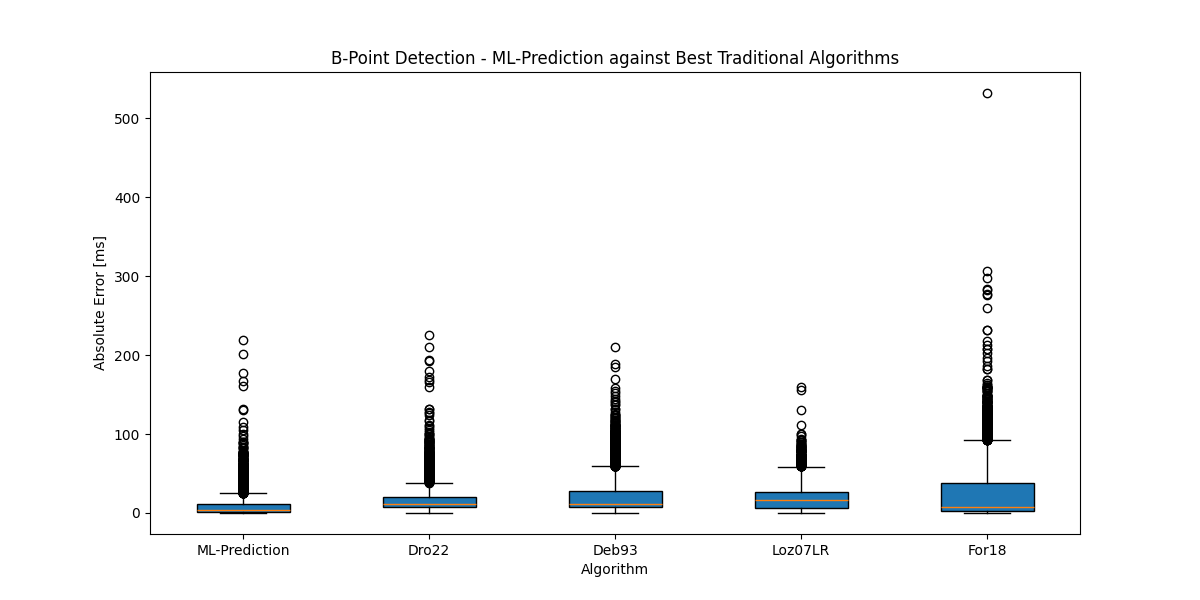

In [45]:
plt.figure(figsize=(12, 6))
plt.boxplot(data, patch_artist=True, labels=labels)
plt.title("B-Point Detection - ML-Prediction against Best Traditional Algorithms")
plt.xlabel("Algorithm")
plt.ylabel("Absolute Error [ms]")
plt.show()

### Residualplot of the ML-Prediction against the reference data

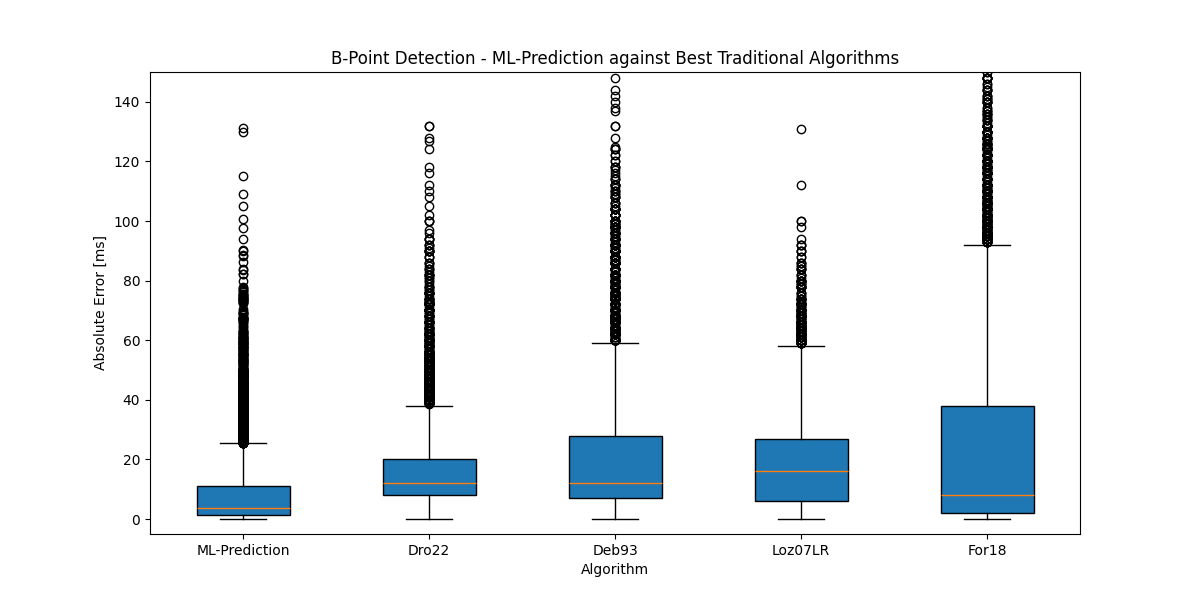

In [69]:
plt.figure(figsize=(12, 6))
plt.boxplot(data, patch_artist=True, labels=labels)
plt.title("B-Point Detection - ML-Prediction against Best Traditional Algorithms")
plt.xlabel("Algorithm")
plt.ylabel("Absolute Error [ms]")
plt.ylim(-5, 150)
plt.show()

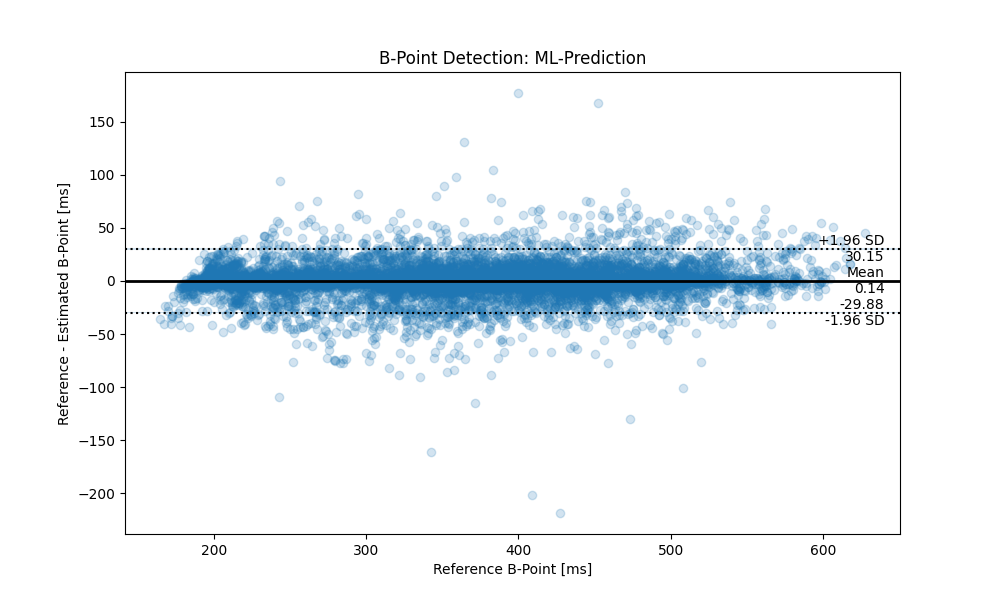

In [59]:
plt.figure(figsize=(10, 6))
pg.plot_blandaltman(best_algo["true_labels"].values[0], best_algo["predicted_labels"].values[0], alpha=0.2)
plt.title("B-Point Detection: ML-Prediction")
plt.xlabel("Reference B-Point [ms]")
plt.ylabel("Reference - Estimated B-Point [ms]")
plt.show()

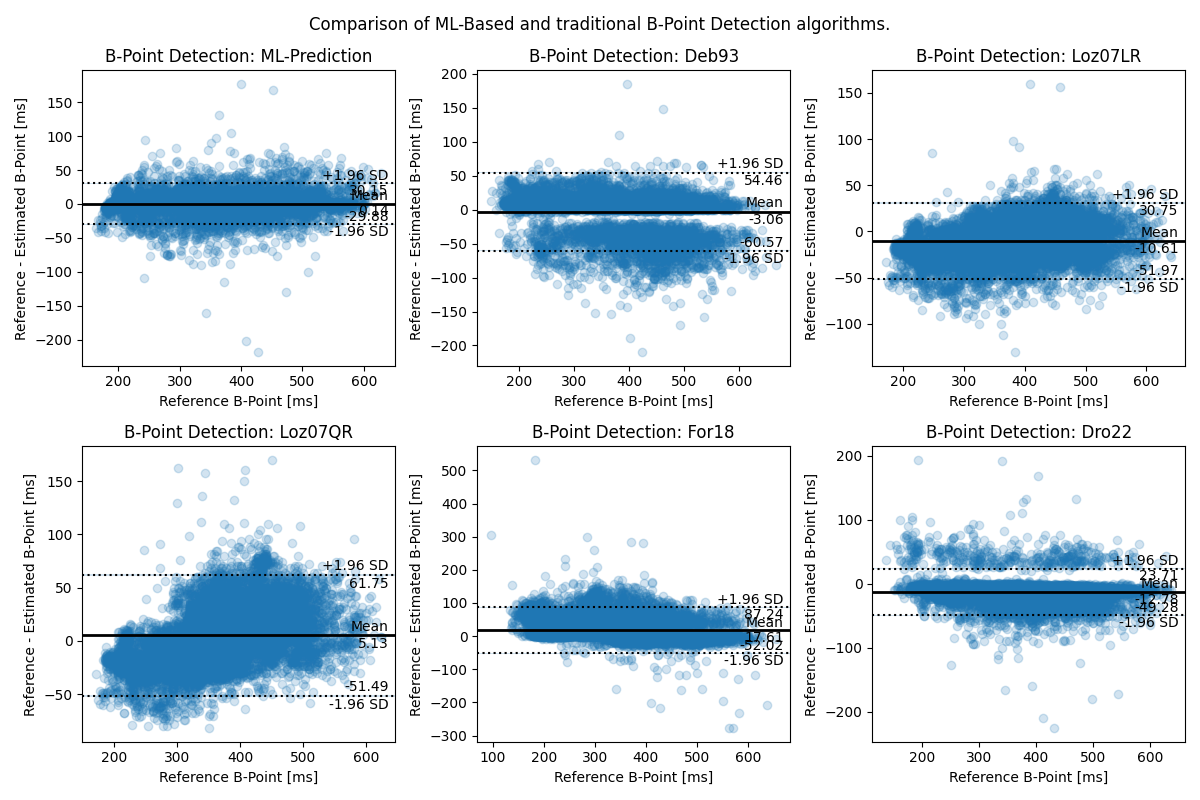

In [67]:
# Create figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Plot Bland-Altman plots
pg.plot_blandaltman(best_algo["true_labels"].values[0], best_algo["predicted_labels"].values[0], ax=axes[0, 0], alpha=0.2)
axes[0, 0].set_title("B-Point Detection: ML-Prediction")
axes[0, 0].set_xlabel("Reference B-Point [ms]")
axes[0, 0].set_ylabel("Reference - Estimated B-Point [ms]")

pg.plot_blandaltman(data_best_algos_empkins['b_point_sample_reference'], data_best_algos_empkins['debski1993-second-derivative_none'], ax=axes[0, 1], alpha=0.2)
axes[0, 1].set_title("B-Point Detection: Deb93")
axes[0, 1].set_xlabel("Reference B-Point [ms]")
axes[0, 1].set_ylabel("Reference - Estimated B-Point [ms]")

pg.plot_blandaltman(data_best_algos_empkins['b_point_sample_reference'], data_best_algos_empkins['lozano2007-linear-regression_none'], ax=axes[0, 2], alpha=0.2)
axes[0, 2].set_title("B-Point Detection: Loz07LR")
axes[0, 2].set_xlabel("Reference B-Point [ms]")
axes[0, 2].set_ylabel("Reference - Estimated B-Point [ms]")

pg.plot_blandaltman(data_best_algos_empkins['b_point_sample_reference'], data_best_algos_empkins['lozano2007-quadratic-regression_none'], ax=axes[1, 0], alpha=0.2)
axes[1, 0].set_title("B-Point Detection: Loz07QR")
axes[1, 0].set_xlabel("Reference B-Point [ms]")
axes[1, 0].set_ylabel("Reference - Estimated B-Point [ms]")

pg.plot_blandaltman(data_best_algos_empkins['b_point_sample_reference'], data_best_algos_guardian['forounzafar2018_none'], ax=axes[1, 1], alpha=0.2)
axes[1, 1].set_title("B-Point Detection: For18")
axes[1, 1].set_xlabel("Reference B-Point [ms]")
axes[1, 1].set_ylabel("Reference - Estimated B-Point [ms]")

pg.plot_blandaltman(data_best_algos_empkins['b_point_sample_reference'], data_best_algos_guardian['drost2022_none'], ax=axes[1, 2], alpha=0.2)
axes[1, 2].set_title("B-Point Detection: Dro22")
axes[1, 2].set_xlabel("Reference B-Point [ms]")
axes[1, 2].set_ylabel("Reference - Estimated B-Point [ms]")

fig.suptitle("Comparison of ML-Based and traditional B-Point Detection algorithms.")
plt.tight_layout()
plt.show()